## Quantifying uncertainty in the MACE model: bootstrapping and deep ensembles. 


You are offered to validate the results obtained previously, outlined in "Strategies of uncertainty quantification for graph-neural-network-based interatomic potentials" by M. Radova. The report contains details about the dataset, MACE architecture, computational details and information on the chosen UQ strategies, which are deep ensembles and bootstrapped ensembles. It is recommended to read the report to understand the background of the offered task. 
For this task, you are not required to train any models, as it would require ~24h, if the 10 ensemble members are trained simultaneously. 

You are provided with 2 pre-trained ensembles, which have been evaluated, with predicted structures written into "x_predictions.npz" files. 
For both deep and bootstrapped ensembles, the hyperparameters stated in the report were used, apart from the list of random seeds for deep ensembles, which was regenerated, and is as follows: split1: 45637, split2: 546, split3: 2648, split4: 334, split5: 738990.

For the bootstrapped ensemble, test/train/validation splits were regenerated, to ensure the difference to the original bootstrapped ensemble. Importantly, the boostrapped ensemble is trained on the same random seed, which is a default 123. 

To obtain the standard deviations on the data, for each data point, predictions are extracted from each ensemble member, and the mean and variance are calculated. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mean σ, eV : 0.005487420202870646


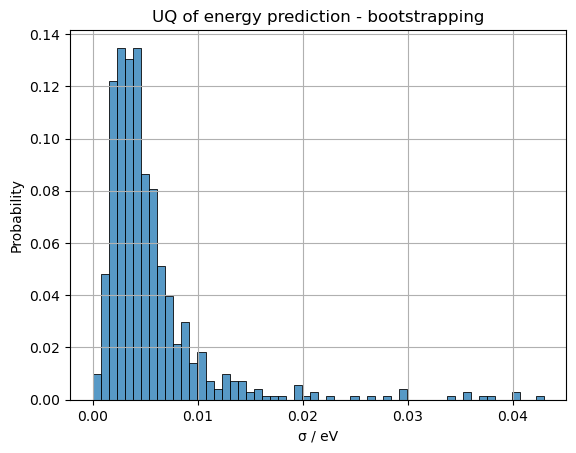

In [14]:
#Bootstraps UQ

option = 'bootstraps'
property_str = 'energy'

prediction1 = np.load(f'{option}/b1_predictions.npz',allow_pickle=True)[property_str].tolist()
prediction2 = np.load(f'{option}/b2_predictions.npz',allow_pickle=True)[property_str].tolist()
prediction3 = np.load(f'{option}/b3_predictions.npz',allow_pickle=True)[property_str].tolist()
prediction4 = np.load(f'{option}/b4_predictions.npz',allow_pickle=True)[property_str].tolist()
prediction5 = np.load(f'{option}/b5_predictions.npz',allow_pickle=True)[property_str].tolist()

num = 5
length = len(prediction1)
mean_energies = np.zeros(length)
e_squared_diffs = np.zeros((length, num))
e_variances = np.zeros(length)
e_std = np.zeros(length)


pred1 = np.zeros(length)
pred2 = np.zeros(length)
pred3 = np.zeros(length)
pred4 = np.zeros(length)
pred5 = np.zeros(length)

if property_str=='energy':
    pm1 = min(prediction1)
    pm2 = min(prediction2)
    pm3 = min(prediction3)
    pm4 = min(prediction4)
    pm5 = min(prediction5)
    for i in range(length):
        pred1[i] = prediction1[i] - pm1
        pred2[i] = prediction2[i] - pm2
        pred3[i] = prediction3[i] - pm3
        pred4[i] = prediction4[i] - pm4
        pred5[i] = prediction5[i] - pm5
        
    
if property_str=='energy':
    for i in range(length):
           preds = np.array([float(pred1[i]), float(pred2[i]), float(pred3[i]), float(pred4[i]), float(pred5[i])]) 
           mean_energies[i] = np.mean(preds, dtype=np.float64)
        
  
if property_str=='energy':
    for i in range(length):
           j=0
           for pred in [pred1, pred2, pred3, pred4, pred5]:
               e_squared_diffs[i,j] = (pred[i] - mean_energies[i])**2
               j=j+1
           e_variances[i] = np.mean(e_squared_diffs[i,:], axis=0)
           e_std[i] = np.sqrt(e_variances[i])

sns.histplot(e_std,stat="probability")

plt.xlabel('σ / eV')
plt.ylabel('Probability')
plt.title('UQ of energy prediction - bootstrapping')
plt.grid(True)
plt.savefig('e_uq_b.png')

print("Mean σ, eV :", np.mean(e_std))


Mean σ, eV : 0.009678556148518234


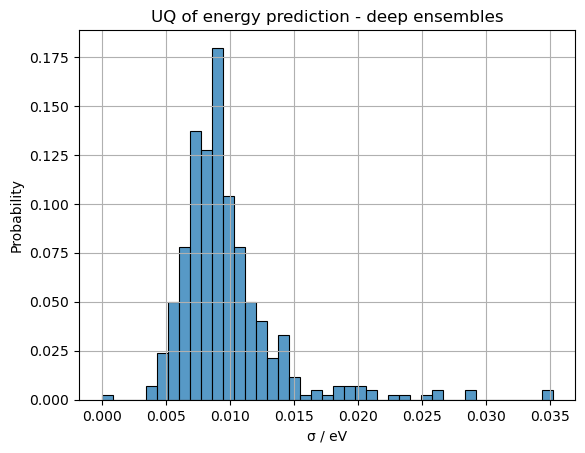

In [15]:
#Deep ensembles UQ


option = 'deep_ensembles'
property_str = 'energy'

prediction1 = np.load(f'{option}/f1_predictions.npz',allow_pickle=True)[property_str].tolist()
prediction2 = np.load(f'{option}/f2_predictions.npz',allow_pickle=True)[property_str].tolist()
prediction3 = np.load(f'{option}/f3_predictions.npz',allow_pickle=True)[property_str].tolist()
prediction4 = np.load(f'{option}/f4_predictions.npz',allow_pickle=True)[property_str].tolist()
prediction5 = np.load(f'{option}/f5_predictions.npz',allow_pickle=True)[property_str].tolist()

num = 5
length = len(prediction1)
mean_energies = np.zeros(length)
e_squared_diffs = np.zeros((length, num))
e_variances = np.zeros(length)
e_std = np.zeros(length)


pred1 = np.zeros(length)
pred2 = np.zeros(length)
pred3 = np.zeros(length)
pred4 = np.zeros(length)
pred5 = np.zeros(length)

if property_str=='energy':
    pm1 = min(prediction1)
    pm2 = min(prediction2)
    pm3 = min(prediction3)
    pm4 = min(prediction4)
    pm5 = min(prediction5)
    for i in range(length):
        pred1[i] = prediction1[i] - pm1
        pred2[i] = prediction2[i] - pm2
        pred3[i] = prediction3[i] - pm3
        pred4[i] = prediction4[i] - pm4
        pred5[i] = prediction5[i] - pm5
        
    
if property_str=='energy':
    for i in range(length):
           preds = np.array([float(pred1[i]), float(pred2[i]), float(pred3[i]), float(pred4[i]), float(pred5[i])]) 
           mean_energies[i] = np.mean(preds, dtype=np.float64)
        
  
if property_str=='energy':
    for i in range(length):
           j=0
           for pred in [pred1, pred2, pred3, pred4, pred5]:
               e_squared_diffs[i,j] = (pred[i] - mean_energies[i])**2
               j=j+1
           e_variances[i] = np.mean(e_squared_diffs[i,:], axis=0)
           e_std[i] = np.sqrt(e_variances[i])


sns.histplot(e_std,stat="probability")

plt.xlabel('σ / eV')
plt.ylabel('Probability')
plt.title('UQ of energy prediction - deep ensembles')
plt.grid(True)
plt.savefig('e_uq_f.png')

print("Mean σ, eV :", np.mean(e_std))